In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import random
import numpy as np
import keras
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
data = pd.read_csv('/Users/jiaxiwang/Documents/20-Fall/ZTGG/project3/creditcard.csv')

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data['Class'].unique()

array([0, 1])

## Data Cleaning

### Drop "Time" feature and normalize "Amount"

In [6]:
data = data.drop(['Time'], axis = 1)

In [7]:
non_zero = 0.001 # for taking log of the amount column, which may contain zero values.
data['Amount_log']= np.log(data['Amount']+non_zero)
data = data.drop(['Amount'], axis = 1)
data = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_log','Class'] ]
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,2.942089,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,2.023685,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-6.907755,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,1.722945,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,3.091088,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,4.345959,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,10.153902,1.000000


## Visualize Data

### Imbalanced Data

0.001727485630620034


/Users/jiaxiwang/anaconda3/envs/new/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


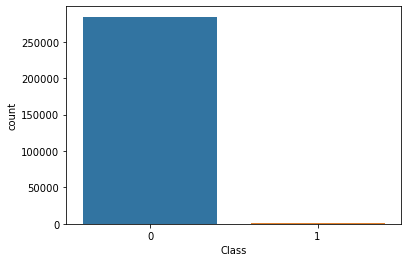

In [8]:
sns.countplot(data['Class'])

data['Class'].value_counts()

print('{}'.format(492/(284315+492)))

## Downsampling the freud class data

In [9]:
fraud = data[data['Class']==1]
not_fraud = data[data['Class']==0]

In [10]:
not_fraud_downsampled = resample(not_fraud, replace = True, n_samples = len(fraud), random_state = 42)

In [11]:
data = pd.concat([fraud, not_fraud_downsampled])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 541 to 90141
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          984 non-null    float64
 1   V2          984 non-null    float64
 2   V3          984 non-null    float64
 3   V4          984 non-null    float64
 4   V5          984 non-null    float64
 5   V6          984 non-null    float64
 6   V7          984 non-null    float64
 7   V8          984 non-null    float64
 8   V9          984 non-null    float64
 9   V10         984 non-null    float64
 10  V11         984 non-null    float64
 11  V12         984 non-null    float64
 12  V13         984 non-null    float64
 13  V14         984 non-null    float64
 14  V15         984 non-null    float64
 15  V16         984 non-null    float64
 16  V17         984 non-null    float64
 17  V18         984 non-null    float64
 18  V19         984 non-null    float64
 19  V20         984 non-null 

### Over-sampling using SMOTE (not-used for ML later)

In [12]:
# X = data.loc[:, data.columns != 'Class']
# y = data.loc[:, data.columns == 'Class']
# print("Number of samples in X: {}".format(len(X)),"\nNumber of samples in y: {}".format(len(y)))

In [13]:
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# y['Class'].value_counts()
# print(y['Class'].value_counts(),'\n')

## Split data into train and test sets

### To avoid overfitting, we split the train/validation/test data. 
The reason that we want to keep a validation set is because we will be tuning hyperparameters later. Having a validation set from the training data helps us to keep the test data untouched during tuning. The test data will be used after we finishied tuning all the hyperparameters. This step ensures the prediction on test data.

In [14]:
train_df, test_df = train_test_split(data, test_size=0.3)
train_df, val_df = train_test_split(train_df, test_size=0.3)

## create labels and features in numpy array forms

# prepare y values (labels):

y_train = np.array(train_df.pop('Class'))
bool_y_train = y_train != 0 # takes out the fraud 
y_val  = np.array(val_df.pop('Class'))
y_test = np.array(test_df.pop('Class'))

# prepare features:

X_train = np.array(train_df)
X_val   = np.array(val_df)
X_test = np.array(test_df)

In [15]:
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training labels shape: (481,)
Validation labels shape: (207,)
Test labels shape: (296,)
Training features shape: (481, 29)
Validation features shape: (207, 29)
Test features shape: (296, 29)


## Evaluation Scores: accuracy, f1_score, recall_score

 - Accuracy is percentage rate of predictions that are accurately predicted.
 - f1_score: the weighted average of precision and recall. 
 - recall_score: the percentage of acutal positives that were correctly classified.
 
F1 score and recall scores are useful when handling imbalanced data like this one. 

In [16]:
def scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy score: {}'.format(accuracy))
    
    f1 = f1_score(y_test, y_pred)
    print('F1_score: {}'.format(f1))
    
    recall = recall_score(y_test, y_pred)
    print('Recall_score: {}'.format(recall))

## Random Forest

In [30]:
clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X_train,y_train)
clf_pred = clf.predict(X_val)
print(classification_report(y_val, clf_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.98      0.95      0.97       105

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



## Logistic Regression

In [31]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)
print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.97      0.95      0.96       105

    accuracy                           0.96       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.96      0.96      0.96       207



## Neural Network

In [39]:
model = keras.Sequential([
      keras.layers.Dense(
          32, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                        ),
                          ])

model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)


prediction = model.predict(X_val)
print(classification_report(y_val, prediction.round()))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.98      0.95      0.97       105

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



## Tuning the hyperparameters

### Increase number of layers

In [40]:
model = keras.Sequential([
      keras.layers.Dense(
          64, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(    
          32, activation='relu'),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                        ),
  ])

model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)

prediction = model.predict(X_val)
print(classification_report(y_val, prediction.round()))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.97      0.95      0.96       105

    accuracy                           0.96       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.96      0.96      0.96       207



In [41]:
model = keras.Sequential([
      keras.layers.Dense(
          128, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(    
          64, activation='relu'),
      keras.layers.Dense(    
          32, activation='relu'),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                        ),
  ])

model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)

prediction = model.predict(X_val)
print(classification_report(y_val, prediction.round()))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       102
           1       0.94      0.96      0.95       105

    accuracy                           0.95       207
   macro avg       0.95      0.95      0.95       207
weighted avg       0.95      0.95      0.95       207



### Changing learning rate 

In [22]:
model = keras.Sequential([
      keras.layers.Dense(
          64, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(    
          32, activation='relu'),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='softmax',
                        ),
  ])

model.compile(
      optimizer = keras.optimizers.Adam(lr=0.001),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)

prediction = model.predict(X_val)
scores(y_val, prediction.round())

Accuracy score: 0.5072463768115942
F1_score: 0.6730769230769231
Recall_score: 1.0


In [23]:
model = keras.Sequential([
      keras.layers.Dense(
          64, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(    
          32, activation='relu'),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='softmax',
                        ),
  ])

model.compile(
      optimizer = keras.optimizers.Adam(lr=0.000001),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
prediction = model.predict(X_val)
scores(y_val, prediction.round())

Accuracy score: 0.5072463768115942
F1_score: 0.6730769230769231
Recall_score: 1.0


### Batch size

In [42]:
model = keras.Sequential([
      keras.layers.Dense(
          64, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(    
          32, activation='relu'),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                        ),
  ])

model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

history = model.fit(X_train, y_train, validation_data= (X_val, y_val),batch_size=128, epochs=10, verbose=0)

prediction = model.predict(X_val)
print(classification_report(y_val, prediction.round()))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.95      0.94      0.95       105

    accuracy                           0.95       207
   macro avg       0.95      0.95      0.95       207
weighted avg       0.95      0.95      0.95       207



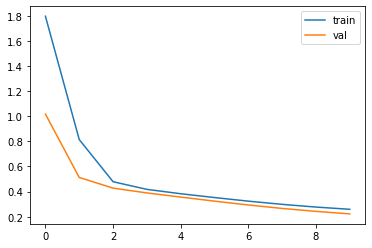

In [43]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

### Summary 

Looks like with three layers, batch_size of 32, the three scores (accuracy, f1_score and recall_score) are higher.
Now let's finally test the neural network on the test set, which the computer has never run before.

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       145
           1       0.97      0.88      0.92       151

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



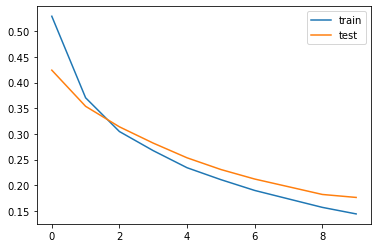

In [47]:
model = keras.Sequential([
      keras.layers.Dense(
          64, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(    
          32, activation='relu'),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                        ),
  ])

model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

history = model.fit(X_train, y_train, validation_data= (X_test, y_test),batch_size=32, epochs=10, verbose=0)

prediction = model.predict(X_test)
print(classification_report(y_test, prediction.round()))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       145
           1       0.96      0.91      0.94       151

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



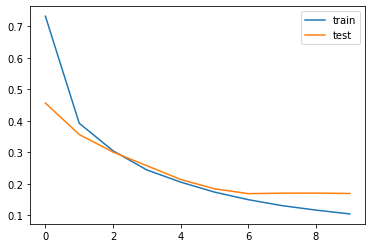

In [48]:
model = keras.Sequential([
      keras.layers.Dense(
          128, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(    
          64, activation='relu'),
      keras.layers.Dense(    
          32, activation='relu'),
      keras.layers.Dense(
          16, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                        ),
  ])

model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

history = model.fit(X_train, y_train, validation_data= (X_test, y_test),batch_size=64, epochs=10, verbose=0)

prediction = model.predict(X_test)
print(classification_report(y_test, prediction.round()))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## AUC

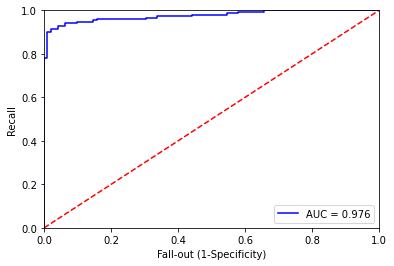

In [49]:
false_positive_rate, recall, thresholds = roc_curve(y_test, prediction)

roc_auc = auc(false_positive_rate, recall)

plt.figure()
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

The closser AUC is to 1 indicates that the better the model is at predicting the TF, or in other words, there is small
false positives and small false nagatives.